# Wine Quality Dataset
<br>

#### A Little Background
<br>
<font color='red'>
15% of total Portugese production comes from producing Wine. Regulatory bodies have been developing new technologies for wine certification as this prevents illegal supply of wine and assures good quality of wine. This data has been collected from May 2004 to Feb 2007 tested by the official certification entry(CVRVV).
</font>

    
    The data has been recorded by iLab which automatically manages wine sample testing from producer requests to lab and    sensory analysis
<font color='green'>
<h5>
    We have limited data due to logistic issue. The data is for White Wine with the following predictors(or its ingredients):-
    </h5>
</font>
<ul>
    <li>Fixed Acidity</li>
    <li>Volatile Acidity</li>
    <li>Citric Acid</li>
    <li>Residual Sugar</li>
    <li>Chlorides</li>
    <li>Free Sulfur Dioxide</li>
    <li>Total Sulfur Dioxide</li>
    <li>Density</li>
    <li>pH</li>
    <li>Sulphates</li>
    <li>Alcohol</li>
</ul>

### Ouput Variable 
Quality (Score Between 0-10)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Since its a CSV with ; as the seperation, we specify it as seperation

In [2]:
data=pd.read_csv('winequality-white.csv',sep=';',header=0)

In [3]:
data.shape

(4898, 12)

In [4]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Below are the three ways in which we can check for Null Values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Now I will check for outliers and see if I can remove them. In Simple Terms We Remove Outliers because outliers are big values that influence your prediction and its necessary to remove them for an unbiased/accurate prediction.

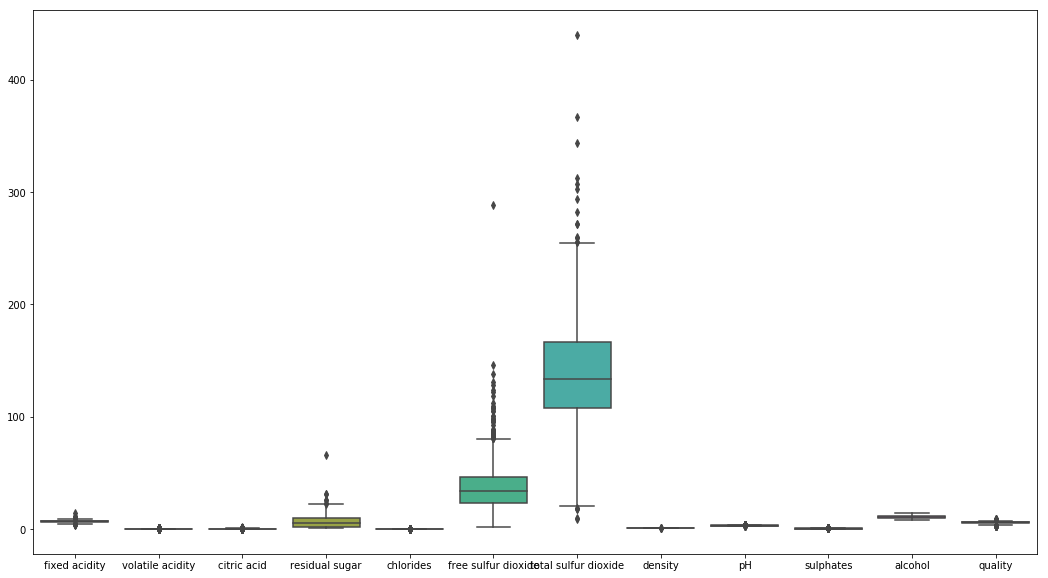

In [9]:
plt.figure(figsize=(18,10))
sns.boxplot(data=data)

The below three fields have outliers as you can see the boxplot tells the distribution of the data and the Big Line on the ends is the data with 3 standard Deviation above the mean which is the Middle Line.

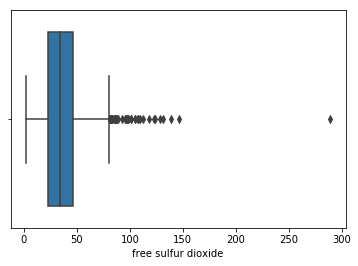

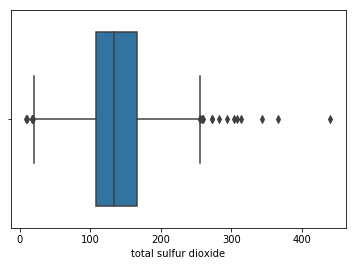

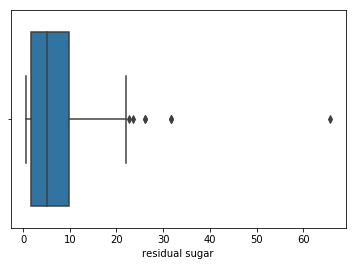

In [10]:
for i in ['free sulfur dioxide','total sulfur dioxide','residual sugar']:
    sns.boxplot(data[i])
    plt.show()

Since these fields are the contents of the wine, it will not be viable to remove the outliers as some wines may have high sulfur dioxide. 

We can remove an outlier in a case where age is around 200 which is not sensible.

In [11]:
#data=data[data['free sulfur dioxide']<78]
#data=data[(data['total sulfur dioxide']<250) & (data['total sulfur dioxide'] >20)]
#data=data[data['residual sugar']<22]

In [12]:
data.shape

(4898, 12)

Further I check for Normal DIstribution. The Only Purpose of Doing So is that the Normal Distribution helps make Statistics easier.

C:\Users\priya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


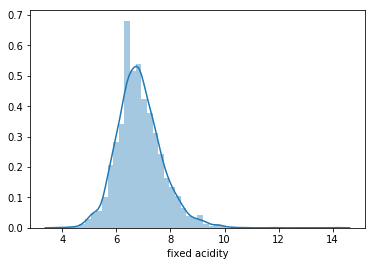

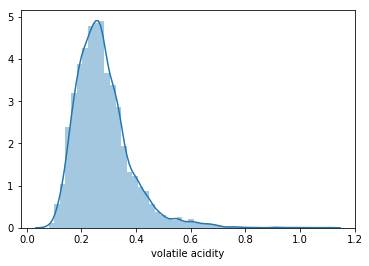

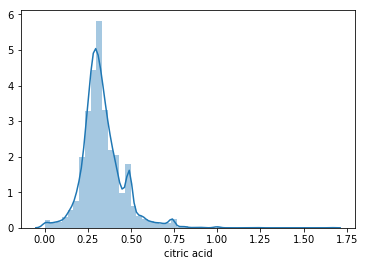

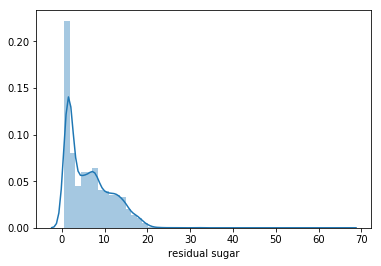

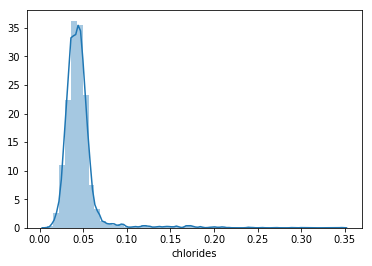

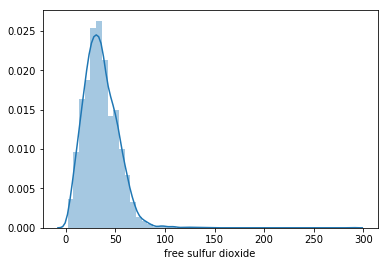

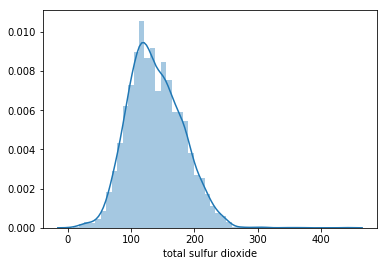

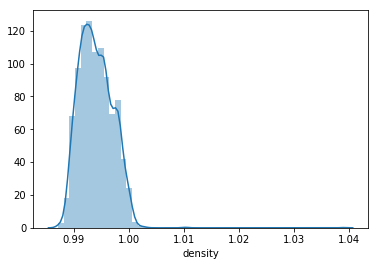

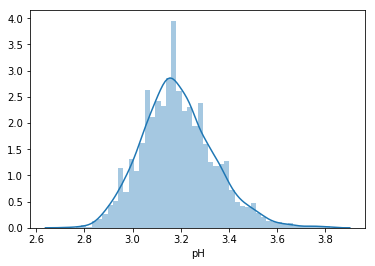

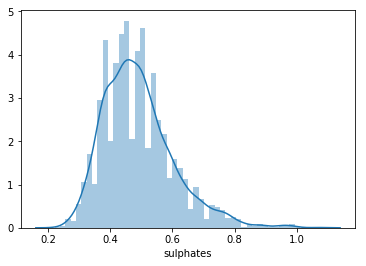

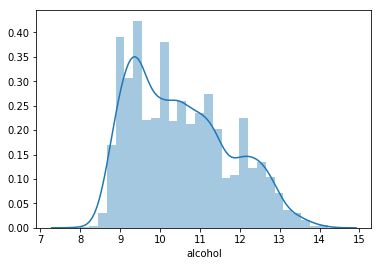

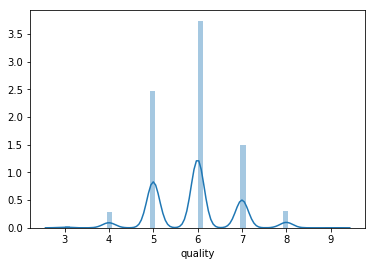

In [13]:
for col in data.columns:
    sns.distplot(data[col])
    plt.show()

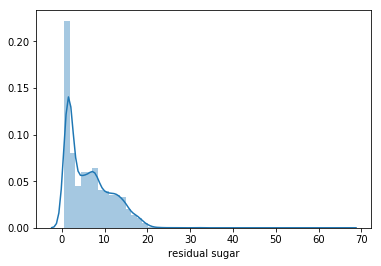

In [14]:
sns.distplot(data['residual sugar'])

I Can see the Varibale Residual Sugar was not Normally Distributed, infact is Right Skewed(Its tail on the right side). Hence Transforming It into Normal would help in better prediction.

Two Types of Transformations can be Done on the Skewed Data based on the skewness pattern:-

<ul>
    <li> If it is Right skewed, apply Log, Square Root Or Cube Root Transformations </li>
    <li> If it is Left Skewed, applying Box-Cox Transformation would be beneficial </li>
   
</ul>

But When I tried to Do So, it can clearly see the data represents two different populations. You can see Below

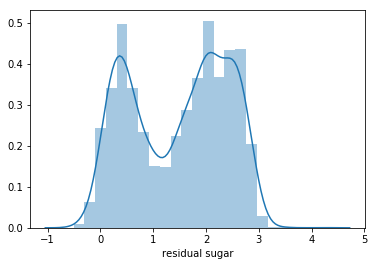

In [15]:
#sns.distplot(np.sqrt(data['residual sugar']))
#sns.distplot(np.cbrt(data['residual sugar']))
sns.distplot(np.log(data['residual sugar']))

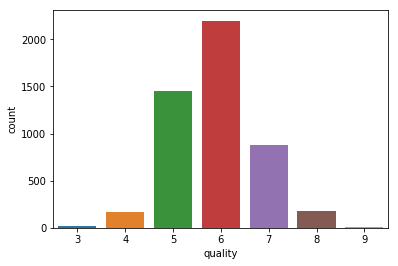

In [16]:
sns.countplot(x='quality',data=data)

Now We Would Do Feature Engineering. We see which variables are most related and are have multicoliinearity. 

If there is multicollinearity it means two variables are highly correlated with each other and can hint us towards two things being the same but in different variables.

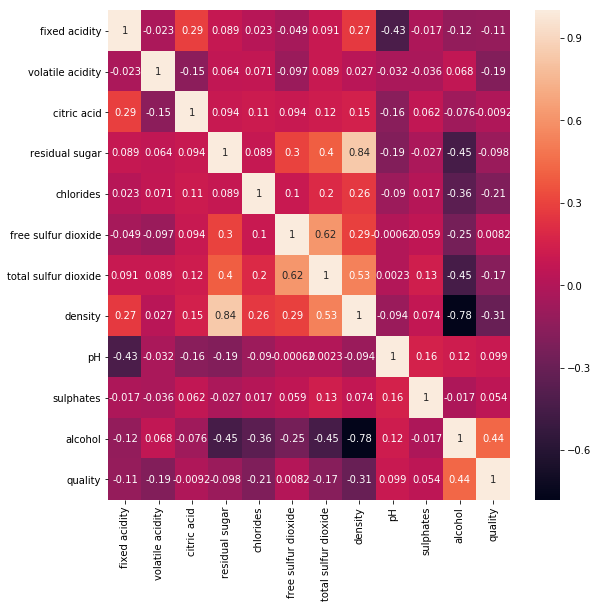

In [17]:
cormatrx=data.corr()
plt.figure(figsize=(9,9))
sns.heatmap(cormatrx,annot=True)

Here I can see Density and Residual Sugar has a 0.83 correlation factor. Correlation is from -1 to 1 with 1 being positive and -1 being negative correlation. 0 is no correlation. Similarly I drop Free Sulphur Dioxide which is correlated with Total Sulfur and since Total Sulfur has more correlation with QUALITY as compared to Free Sulphur I retain it


In [18]:
data.drop(['residual sugar'],axis=1,inplace=True)
data.drop(['free sulfur dioxide'],axis=1,inplace=True)

In [19]:
data.shape

(4898, 10)

Next I want to see the linear relationship Between The predictors and response variable and unfortunately there is not much positive response

<Figure size 1440x1440 with 0 Axes>

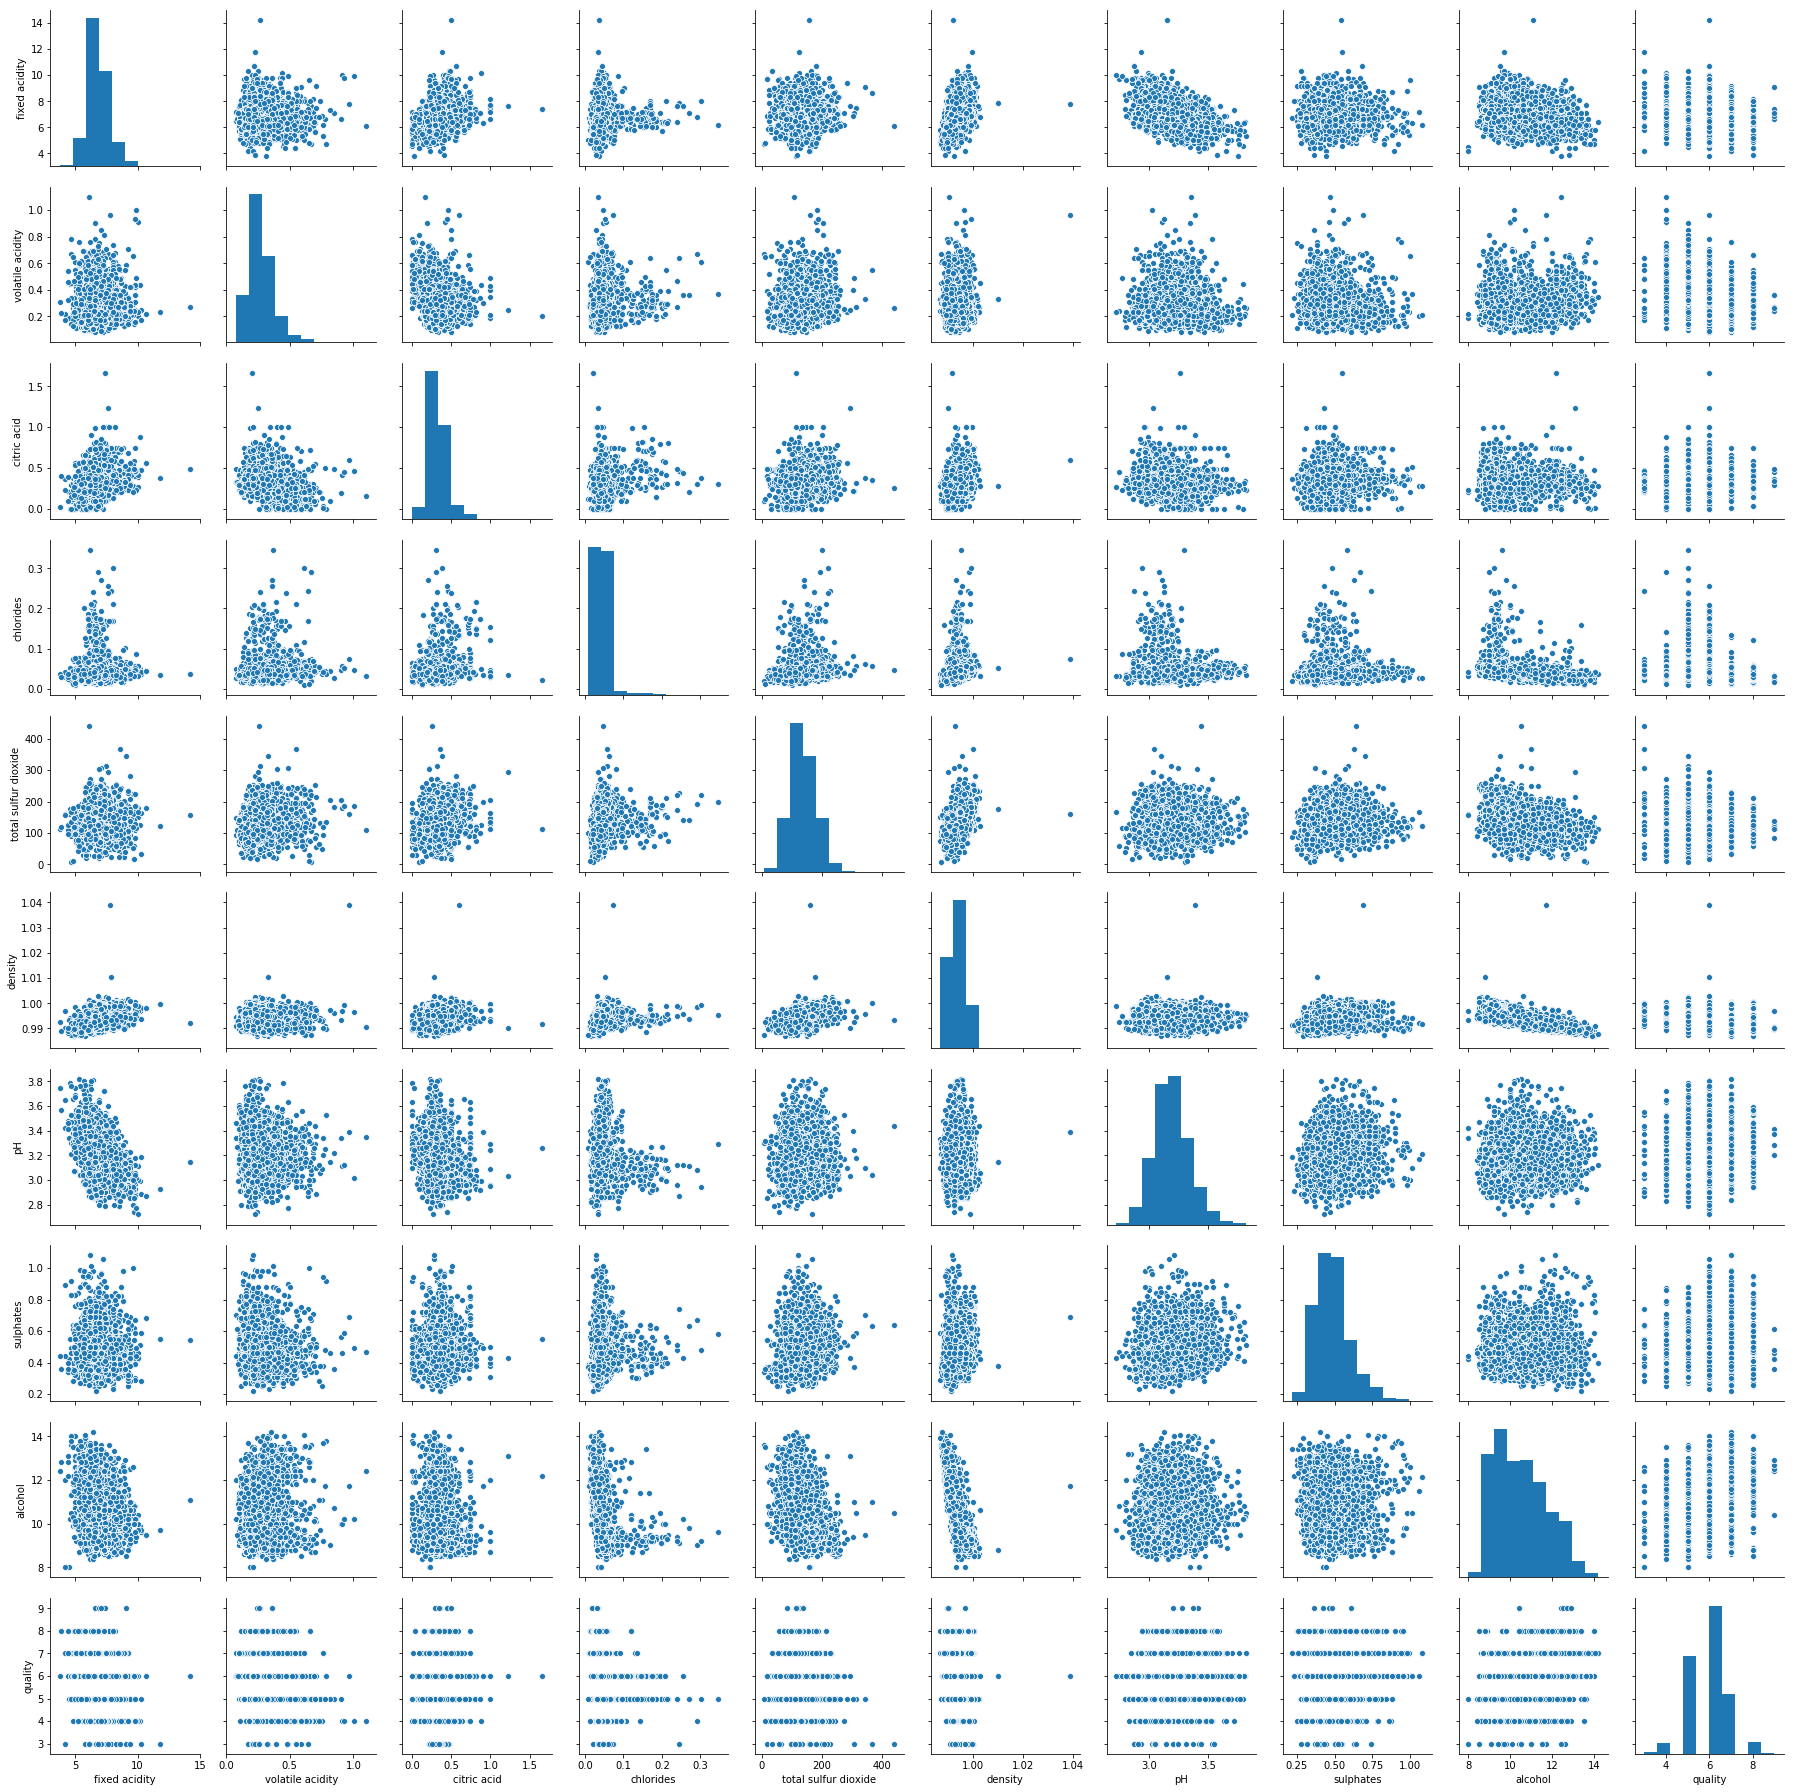

In [20]:
plt.figure(figsize=(20,20))
sns.pairplot(data)

The Below Steps Are Just to Break the Data and Split it into Test-Train to test on one and traina on one.

We thenn fit the Linear Regression and Check The R2 Metric which is a standard and a very useful metric for Regression Problem

At the Last we Use XGBoost Algorithm which helps us reach the local mimima and hence reduces the cost to the most.

In [21]:
X=data.drop(['quality'],axis=1)
y=data['quality']

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [24]:
from sklearn.linear_model import LinearRegression
linearreg=LinearRegression()

In [25]:
linearreg.fit(X_train,y_train)
predictions=linearreg.predict(X_test)

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.2634794107272126

In [27]:
from xgboost import XGBRegressor
xbreg=XGBRegressor()
xbreg.fit(X_train,y_train)
predictions1=xbreg.predict(X_test)
r2_score(y_test,predictions1)

0.3660555960160621